In [157]:
%run "curve_fit_.ipynb"
%run "data_processing_.ipynb"
%run "evaluation_functions_.ipynb"
%run "fitting_functions_.ipynb"
%run "get_temperature_.ipynb"
%run "load_data_.ipynb"
%run "get_backbround_average_.ipynb"
%run "frame_vs_temperature.ipynb"

# Input Files

## input needed: name of the folder containing different velocity's picture

In [158]:
folder = "/Users/chiaentsai/Box/MURI-SARA/Thermoreflectance/Joanne/12102022"


In [159]:
all_files, fivemm_files, velocity_path_list, velocity_list, used_frame_num = get_needed_files(folder)
back_intensity_list = get_background_average(fivemm_files)
power_list = get_powers(all_files)

### Si&gold melting power

In [160]:
Si_melting_W = {
    '103': 48.8,
    #'13': 41.5,
    '155': 50.8,
    '190': 52.5, 
    #'20': 42.6,
    '234': 54.3,
    '30': 42.9,
    '352': 58.5,
    '45': 44.2,
    #'68': 46.9,
    '9': 40.9
}

In [161]:
gold_melting_W = {
    '103': 45.8,
    #'13': 37.2,
    '155': 47.7,
    '190': 49.7, 
    #'20': 38.4,
    '234': 50.4,
    '30': 39.1,
    '352': 54.4,
    '45': 40.7,
    #'68': 43,
    '9': 35.3
}

### get dR/R

In [162]:
Si_list = ['103', '155','190', '234', '30', '352', '45', '9']
Dict_Si_1 = dict((k, fivemm_files[k][10:]) for k in Si_list)
back_intensity_list_Si_1 = []
for key in fivemm_files:
    if key in Si_list:
        index = list(fivemm_files).index(key)
        back_intensity_list_Si_1.append(back_intensity_list[index])
dRoverR_1 = []
for i, v in enumerate(list(Dict_Si_1.keys())):
    con = []
    for file in Dict_Si_1[v]:
        val = get_peak_dRoverR(file, back_intensity_list_Si_1[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_1.append(con)

/Users/chiaentsai/.virtualenvs/venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [163]:
# gold_list = ['103', '13', '155','190', '20', '234', '30', '352', '45', '68', '9']
gold_list = ['103', '155','190', '234', '30', '352', '45', '9']
Dict_gold_1 = dict((k, fivemm_files[k][10:]) for k in gold_list)
back_intensity_list_gold_1 = []
for key in fivemm_files:
    if key in Si_list:
        index = list(fivemm_files).index(key)
        back_intensity_list_gold_1.append(back_intensity_list[index])
dRoverR_2 = []
for i, v in enumerate(list(Dict_gold_1.keys())):
    con = []
    for file in Dict_gold_1[v]:
        val = get_peak_dRoverR(file, back_intensity_list_gold_1[i], two_lorentz, two_lorentz)
        con.append(val)
    dRoverR_2.append(con)

### power used

In [165]:
power_Si = {'103':[31+2*p for p in range(0,len(dRoverR_1[0]),1)], 
        #'13':[25+2*p for p in range(0,len(dRoverR_1[1]),1)], 
        '155':[33+2*p for p in range(0,len(dRoverR_1[1]),1)],
        '190':[35+2*p for p in range(0,len(dRoverR_1[2]),1)], 
        #'20':[27+2*p for p in range(0,len(dRoverR_1[4]),1)], 
        '234':[37+2*p for p in range(0,len(dRoverR_1[3]),1)], 
        '30':[29+2*p for p in range(0,len(dRoverR_1[4]),1)], 
        '352':[39+2*p for p in range(0,len(dRoverR_1[5]),1)], 
        '45':[29+2*p for p in range(0,len(dRoverR_1[6]),1)], 
        #'68':[29+2*p for p in range(0,len(dRoverR_1[7]),1)], 
        '9':[21+2*p for p in range(0,len(dRoverR_1[7]),1)]}

### plot dR/R

In [139]:
for i, v in enumerate(list(Si_melting_W.keys())):
    plt.plot(power_Si[v], dRoverR_1[i], '.')
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_figure_12102022/{}mm.png".format(v), format="PNG")
    plt.close()

### get kappa (use glod and Si melting power)

In [231]:
# gold and Si melt
import scipy.optimize
kappa_avg = []
for i, v in enumerate(list(Si_melting_W.keys())):
    popt, pcov = curve_fit(expo, power_Si[v], dRoverR_1[i], p0 = [1, 0.000000047, 1], maxfev = 10000)
    #a, b, c = popt
    plt.plot(power_Si[v], dRoverR_1[i], '.')
    y_pred = [expo(j, *popt) for j in power_Si[v]]
    plt.plot(power_Si[v], y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si&gold_dRoverR_fit_figure_12102022/{}mm.png".format(v), format="PNG")
    plt.close()
    
    
    fun = lambda k: (expo(Si_melting_W[v], *popt) - (1410-21)*k)**2 + (expo(gold_melting_W[v], *popt) - (1064-21)*k)**2
    res = scipy.optimize.minimize(fun, 0.00016)
    temp_pred = [expo(j, *popt)/res.x for j in power_Si[v]]
    plt.plot(power_Si[v], temp_pred)
    
    plt.plot(Si_melting_W[v], 1410, marker="o",color = 'r', label='Si')
    plt.plot(gold_melting_W[v], 1064, marker="o", color = 'g', label='gold')
    plt.legend(loc="upper left")
    plt.xlabel("power")
    plt.ylabel("temperature")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_Si_fit_12102022/{}mm.png".format(v), format="PNG")
    plt.close()
    
#     f = expo(Si_melting_W[v], *popt)
#     gold_m = 1410
#     dT = gold_m - 21
#     kappa = f / dT
    kappa_avg.append(float(res.x))
    
Dict_kappa_avg = dict(zip(list(Si_melting_W.keys()),kappa_avg))

plt.plot(list(Si_melting_W.keys()), kappa_avg, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_gold&Si_12102022.png", format="PNG")

### get kappa (use Si melting power)

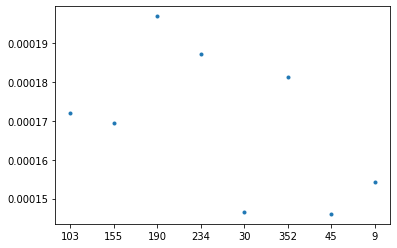

In [112]:
kappa_Si_avg = []
for i, v in enumerate(list(Si_melting_W.keys())):
    popt, pcov = curve_fit(expo, power_Si[v], dRoverR_1[i], p0 = [1, 0.000000047, 1], maxfev = 10000)
    #a, b, c = popt
    plt.plot(power_Si[v], dRoverR_1[i], '.')
    y_pred = [expo(j, *popt) for j in power_Si[v]]
    plt.plot(power_Si[v], y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/Si_dRoverR_fit_figure_12102022/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(Si_melting_W[v], *popt)
    gold_m = 1410
    dT = gold_m - 21
    kappa = f / dT
    kappa_Si_avg.append(kappa)
    
Dict_kappa_Si_avg = dict(zip(list(Si_melting_W.keys()),kappa_Si_avg))

plt.plot(list(Si_melting_W.keys()), kappa_Si_avg, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_Si_12102022.png", format="PNG")

In [113]:
avg_kappa = sum(kappa_Si_avg) / len(kappa_Si_avg)
avg_kappa 

0.00016919601593897468

### get kappa (use gold melting power)

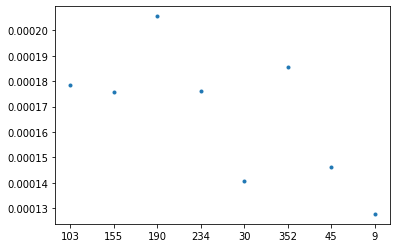

In [145]:
kappa_gold_avg = []
for i, v in enumerate(list(gold_melting_W.keys())):
    popt, pcov = curve_fit(expo, power_Si[v], dRoverR_1[i], p0 = [1, 0.000000047, 1], maxfev = 10000)
    #a, b, c = popt
    plt.plot(power_Si[v], dRoverR_1[i], '.')
    y_pred = [expo(j, *popt) for j in power_Si[v]]
    plt.plot(power_Si[v], y_pred)
    plt.xlabel("power")
    plt.ylabel("dR/R")
    plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/gold_dRoverR_fit_figure_12102022/{}mm.png".format(v), format="PNG")
    plt.close()
    f = expo(gold_melting_W[v], *popt)
    gold_m = 1064
    dT = gold_m - 21
    kappa = f / dT
    kappa_gold_avg.append(kappa)
    
Dict_kappa_gold_avg = dict(zip(list(gold_melting_W.keys()),kappa_gold_avg))

plt.plot(list(gold_melting_W.keys()), kappa_gold_avg, '.')
plt.savefig("/Users/chiaentsai/Desktop/lab/Temperature_Calibration/kappa_gold_12102022.png", format="PNG")

### get peak temperature

In [232]:
peak_temp = []
for i, v in enumerate(list(Si_melting_W.keys())):
    tem = []
    for r in dRoverR_1[i]:
        t = get_peak_Temp(r, Dict_kappa_avg[v])
#         t = get_peak_Temp(r,avg_kappa)
#         t = get_peak_Temp(r,0.00016498400434141028)
#         t = get_peak_Temp(r, Dict_kappa_gold_avg[v])
#         t = get_peak_Temp(r, avg_kappa_2)
#         t = get_peak_Temp(r, Dict_kappa_avg[v])
        tem.append(t)
    peak_temp.append(tem)
    
Dict_peak_temp = dict(zip(list(Si_melting_W.keys()),peak_temp))

### fit plane

In [246]:
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt
%matplotlib

# def function(data, b, c, d, e, f):
#     x = np.array(data[0])
#     y = np.array(data[1])
#     return (b*y+c)*(x)**(d*y**2+e*y+f)

def function(data, a, b, c, d, e, f, g, h):
    x = np.array(data[0])
    y = np.array(data[1])
    return (a+b*y+h*y**2)*x**(f+g*y) + (c+d*y)*x + e

# def function(data, a, b, c, d, e, f, g, h, i, j):
#     x = np.array(data[0])
#     y = np.array(data[1])
#     return (a+b*y+h*y**2)*x**(f+g*y) + (c+d*y)*x + e +i*x**2 + j*y**2

f = plt.figure(figsize=(20.0, 20.0), dpi=20)
matplotlib.pyplot.grid(True)
axes = Axes3D(f)

points = []
for i, v in enumerate(list(Si_melting_W.keys())):
    P = [int(p) for p in power_Si[v]]
    V = [np.log(int(v))] * len(Dict_peak_temp[v])
    T = Dict_peak_temp[v]
    point = [list(x) for x in zip(*[P,V,T])]
    points.append(point)

x_data = []
y_data = []
z_data = []
for velo in points:
    for item in velo:
        x_data.append(item[0]) # power
        y_data.append(item[1]) # velocity
        z_data.append(item[2]) # temperature
        
x_data, y_data, z_data = np.array(x_data), np.array(y_data), np.array(z_data)

mask = z_data > 400
x_data = x_data[mask]
y_data = y_data[mask]
z_data = z_data[mask]

parameters, covariance = curve_fit(function, [x_data, y_data], z_data,  maxfev=1000000)
print(parameters)
model_x_data = np.linspace(min(x_data), max(x_data), 30)
model_y_data = np.linspace(min(y_data), max(y_data), 30)
X, Y = np.meshgrid(model_x_data, model_y_data)
Z = function(np.array([X, Y]), *parameters)

z_predicted = function([x_data, y_data], *parameters)
differences = np.subtract(z_data, z_predicted)
squared_differences = np.square(differences)
mse = squared_differences.mean()


axes.plot_surface(X, Y, Z, cmap=cm.hot, alpha=0.2)

# for i, v in enumerate(list(Dict_kappa_Si_avg.keys())):
#     v_data = [np.log(int(v))] * len(Dict_peak_temp[v])
#     p_data = [int(p) for p in power_Si[i]]
#     t_data = Dict_peak_temp[v]
#     axes.scatter(p_data, v_data, t_data, s = 250)
axes.scatter(x_data, y_data, z_data, s=500)
    

axes.set_title('Scatter Plot')
axes.set_xlabel('power - W', fontsize=30, labelpad=40)
axes.set_ylabel('ln(velocity) - mm/s',fontsize=30, labelpad=40)
axes.set_zlabel('peak temperature - C', fontsize=30, labelpad=40)
axes.set_zlim(400, 1400)

axes.tick_params(axis='both', which='major', labelsize=30)

plt.show()
print(mse)

Using matplotlib backend: MacOSX
[ 1.07905058e+03 -1.97373310e+02 -1.73891144e+03  1.82157825e+02
  4.96514235e+03  1.11250471e+00  2.24302306e-02  8.85130018e+00]
1070.5487061171104


/var/folders/f7/kn96xdj93ss0t67sn2q10n6c0000gn/T/ipykernel_867/2442206922.py:25: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(f)


In [248]:
parameters

array([ 1.07905058e+03, -1.97373310e+02, -1.73891144e+03,  1.82157825e+02,
        4.96514235e+03,  1.11250471e+00,  2.24302306e-02,  8.85130018e+00])

In [59]:
y_data[91:200]

array([2.19722458, 2.19722458, 2.19722458, 2.19722458, 2.19722458,
       2.19722458, 2.19722458, 2.19722458, 2.19722458])

In [62]:
import matplotlib.pyplot as plt
%matplotlib
plt.plot(x_data[0:7], z_data[0:7])
plt.plot(x_data[8:17], z_data[8:17])
plt.plot(x_data[18:25], z_data[18:25] )
plt.plot(x_data[26:34], z_data[26:34])
plt.plot(x_data[35:43], z_data[35:43])
plt.plot(x_data[44:51], z_data[44:51])
plt.plot(x_data[52:60], z_data[52:60])
plt.plot(x_data[61:70], z_data[61:70])
plt.plot(x_data[71:80], z_data[71:80])
plt.plot(x_data[81:90], z_data[81:90])
plt.plot(x_data[91:99], z_data[91:99])
plt.gca().legend(('103', '13', '155','190', '20', '234', '30', '352', '45', '68', '9'))

Using matplotlib backend: MacOSX
